Nome: Ramon Gomes Paulino       - RA: 250504

In [66]:
import numpy as np
import matplotlib.pyplot as plt

1- (a) Calcule a porcentagem de indivíduos susceptíveis, infectados e recuperados em t = 50, ou seja, deter-
mine S(50), I(50) e R(50).

Como o modelo é dado por equações diferenciais com valores iniciais dados, podemos resolver o sistema utilizando método de euler:

In [67]:
def euler(t_max, dt, S0, I0, R0, beta, gamma):
    # Inicialização das listas para armazenar os resultados
    t = [0]
    S = [S0]
    I = [I0]
    R = [R0]

    # Método de Euler para resolver as equações diferenciais
    for i in range(1,int(t_max/dt)):
        dSdt = -beta * I[i-1] * S[i-1]
        dIdt = beta * I[i-1] * S[i-1] - gamma * I[i-1]
        dRdt = gamma * I[i-1]

        t.append(i * dt)
        S.append(S[i-1] + dSdt * dt)
        I.append(I[i-1] + dIdt * dt)
        R.append(R[i-1] + dRdt * dt)
        
    return t, S, I, R

(a) Calcule a porcentagem de indivíduos susceptíveis, infectados e recuperados em t = 50, ou seja, determine S(50), I(50) e R(50).

In [68]:
# Parâmetros do modelo SIR
beta = 0.8  # Taxa de transmissão
gamma = 0.3125  # Taxa de recuperação
N = 1000  # População total

# Condições iniciais
S0 = 0.99  # Indivíduos suscetíveis iniciais
I0 = 0.01  # Indivíduos infectados iniciais
R0 = 0    # Indivíduos recuperados iniciais

# Tempo de simulação
t_max = 51

# Passo de tempo
dt = 1

t, S, I, R = euler(t_max, dt, S0, I0, R0, beta, gamma)

print("Tempo (t) = 50:", t[-1])
print(f"População Suscetível (S) em t=50 : {S[-1]:.4f}")
print(f"População Infectada (I) em t=50: {I[-1]:.4f}")
print(f"População Recuperada (R) em t=50: {R[-1]:.4f}")


Tempo (t) = 50: 50
População Suscetível (S) em t=50 : 0.0768
População Infectada (I) em t=50: 0.0000
População Recuperada (R) em t=50: 0.9232


(b) Quando houve o maior número de infectados? Ou seja, determine t* tal que I(t*) é máximo. Justifique sua resposta.



O momento em que o número de infectados é máximo pode ser determinado pela derivada de I igual a zero, ou seja dI/dt = 0. Da equação 2: <br>
dI_dt = beta * I * S - gamma * I = 0 <br>
I(beta*S - gamma) = 0 <br>
Como estamos buscando o momento de máximos infectados, I não pode ser zero. Logo, <br>
(beta*S - gamma) = 0 → 0,8*S-0,3125 = 0 <br>
0,8*S = 0,3125

In [69]:

s_t = gamma / beta
print(f"População Suscetível (S) no pico de infectados: {s_t:.4f}")

#Porém, para encontrar o valor máximo de I, precisamos encontrar o tempo correspondente. Este tempo seria complexo de calcular 
#analiticamente, então podemos usar uma abordagem numérica para encontrar o tempo em que I é máximo.

#dI/dS = (dI/dt) / (dS/dt) = (beta * I * S - gamma * I) / (-beta * I * S) = -1 + (gamma / (beta * S))

#logo, como temos S = gamma / beta no pico de infectados, podemos integrar dI/dS de S0 até S(t_pico) para encontrar I(t_pico):
I0 = 0.01
S0 = 0.99
s_t = gamma / beta
I_pico = I0 + (S0 - s_t) + (gamma / beta) * np.log(s_t / S0)
print(f"População Infectada (I) no pico de infectados: {I_pico:.4f}")
tempo_pico = t[I.index(max(I))]
print(f"Tempo em que a população infectada é máxima: {tempo_pico} dias")


População Suscetível (S) no pico de infectados: 0.3906
População Infectada (I) no pico de infectados: 0.2461
Tempo em que a população infectada é máxima: 12 dias


(c)Apresente, no mesmo gráfico, a população de indivíduos susceptíveis, infectados e recuperados em
função do tempo, para t ∈ [0, 50].

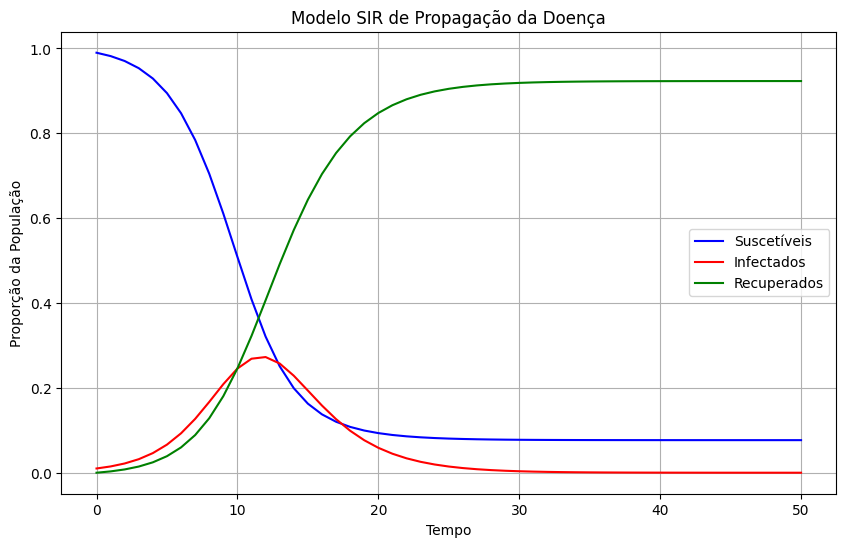

In [70]:
# Plotagem dos resultados
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Suscetíveis', color='blue')
plt.plot(t, I, label='Infectados', color='red')
plt.plot(t, R, label='Recuperados', color='green')
plt.xlabel('Tempo')
plt.ylabel('Proporção da População')
plt.title('Modelo SIR de Propagação da Doença')
plt.legend()
plt.grid()
plt.show()

## 2)Considere o problema de valor de contorno

v′′ + sen(x)v′ + v = (1 − cos(x))e^cos(x) , v′(0) = 0 e v(4π) = e.

### a)Escreva explicitamente o sistema de equações lineares que deve ser resolvido para obter uma aproximação numérica da solução do problema de valor de contorno acima usando o método de diferenças finitas com h = π.

Para resolver o problema de contorno, podemos escrever as derivadas como:

V' = [V(x+h) - V(x-h)]/2h → onde h = π

V" = [V(x+h)-2V(x)+V(x-h)]/h² 

Onde, substituindo na equação inicial, temos:

[V(x+h)-2V(x)+V(x-h)]/h² + sen(x)*[V(x+h) - V(x-h)]/2h + V(x) = (1 − cos(x))e^cos(x)

Para resolvermos numéricamente, como o passo h é dado, podemos reescrever como:

[V(x(i)+h)-2V(x(i))+V(x(i)-h)]/h² + sen(x(i))*[V(x(i)+h) - V(x(i)-h)]/2h + V(x(i)) = (1 − cos(x(i)))e^cos(x(i)) para todo i = 1...N

Como x(i+1) = x+h e x(i-1) = x-h, podemos reescrever novamente a equação como:

[V(x(i+1))-2V(x(i))+V(x(i-1))]/h² + sen(x(i))*[V(x(i+1)) - V(x(i-1))]/2h + V(x(i)) = (1 − cos(x(i)))e^cos(x(i)) para todo i = 1...N

Isolando os termos V(x(i+1)),V(x(i)) e V(x(i-1)), teremos:

V(x(i-1))*(1/h² + sen(x(i))/2h) + V(x(i))*(-2/h² + 1) + V(x(i+1))*(1/h² + sen(x(i))) = (1 − cos(x(i)))e^cos(x(i))

À partir desta equação, podemos descrever o sistema linear dado por :



In [71]:
h = np.pi

X = np.array([1*h, 2*h, 3*h, 4*h])

# Matriz A do sistema linear AV = B
# onde V é o vetor das incógnitas V(x(i)), i = 0...4
A = np.array([[                            1,                             0,                              0,                           0,                           0],
              [(1/h**2 + np.sin(X[0])/(2*h)),                 (-2/h**2 + 1),    1/h**2 + np.sin(X[0])/(2*h),                           0,                           0],
              [                            0, (1/h**2 + np.sin(X[1])/(2*h)),                  (-2/h**2 + 1), 1/h**2 + np.sin(X[1])/(2*h),                           0],
              [                            0,                             0,  (1/h**2 + np.sin(X[2])/(2*h)),               (-2/h**2 + 1), 1/h**2 + np.sin(X[2])/(2*h)],
              [                            0,                             0,                              0,                           0,                           1]])

# B seria o vetor do lado direito da equação AV = B
# como V(0) = 0  e V(4pi) = e , temos:
B = np.array([                                        0,
              (1 - np.cos(X[0])) * np.exp(np.cos(X[0])),
              (1 - np.cos(X[1])) * np.exp(np.cos(X[1])),
              (1 - np.cos(X[2])) * np.exp(np.cos(X[2])),
                                                   np.e])

(b) Encontre uma aproximação numérica do problema de valor de contorno acima usando o método de
diferenças finitas com h = π/16.

Como existe um padrão na construção da matriz A e B, podemos descrever da seguinte forma:

In [72]:
def diferencas_finitas_contorno_correcao(f, a, b, h, va, vb):
    # malha
    N = int((b - a) / h)
    x = np.linspace(a, b, N+1)

    # incógnitas V0..V_{N-1}, V_N = vb conhecido
    A = np.zeros((N, N))
    B = np.zeros(N)

    # i=0:
    A[0, 0] = -2.0 / h**2 + 1.0
    A[0, 1] =  2.0 / h**2
    B[0] = f(x[0])

    # equações internas (diferenças centrais)
    for i in range(1, N-1):
        xi = x[i]
        a_m = 1.0 / h**2 - np.sin(xi) / (2.0 * h)
        a_0 = -2.0 / h**2 + 1.0
        a_p = 1.0 / h**2 + np.sin(xi) / (2.0 * h)
        A[i, i-1] = a_m
        A[i, i]   = a_0
        A[i, i+1] = a_p
        B[i] = f(xi)

    # i = N-1: usar V_N = vb (mover para RHS)
    i = N-1
    xi = x[i]
    a_m = 1.0 / h**2 - np.sin(xi) / (2.0 * h)
    a_0 = -2.0 / h**2 + 1.0
    a_p = 1.0 / h**2 + np.sin(xi) / (2.0 * h)
    A[i, i-1] = a_m
    A[i, i]   = a_0
    B[i] = f(xi) - a_p * vb

    # resolve
    U = np.linalg.solve(A, B)
    V = np.concatenate((U, [vb]))
    return x, V

def f(x):
    return (1 - np.cos(x)) * np.exp(np.cos(x))

# parâmetros do problema
a = 0.0
b = 4.0 * np.pi
h = np.pi / 16
va = 0.0  # v(0) = 0
vb = np.e  # v(4pi) = e

# calcular com os dados do exercício
x_num, v_num = diferencas_finitas_contorno_correcao(f, a, b, h, va, vb)

# V para x(0) até x(4pi)
v_num


array([2.61931002, 2.56881871, 2.42498854, 2.20859364, 1.94798991,
       1.67240843, 1.40642192, 1.16695411, 0.96291756, 0.79666382,
       0.6661771 , 0.56717861, 0.49471837, 0.44417509, 0.41177517,
       0.39479941, 0.39162711, 0.40172216, 0.42561893, 0.46492565,
       0.52232648, 0.60152361, 0.70701481, 0.84355805, 1.01515838,
       1.22347231, 1.46571786, 1.7325222 , 2.00654331, 2.26292806,
       2.47240158, 2.60687073, 2.64613977, 2.5833918 , 2.42721438,
       2.1992837 , 1.92867786, 1.64508902, 1.37327753, 1.1301251 ,
       0.92434634, 0.75801599, 0.62882525, 0.53222747, 0.46305138,
       0.41650747, 0.38870472, 0.37685044, 0.37928611, 0.39546492,
       0.42592898, 0.4723033 , 0.53728635, 0.62457717, 0.73863308,
       0.88410911, 1.06481581, 1.28209593, 1.5327174 , 1.80672793,
       2.08612113, 2.34538262, 2.55470254, 2.68570926, 2.71828183])

(c) Compare graficamente a solução numérica obtida pelo método da diferenças finitas com a solução analítica v(x) = e^cos(x)

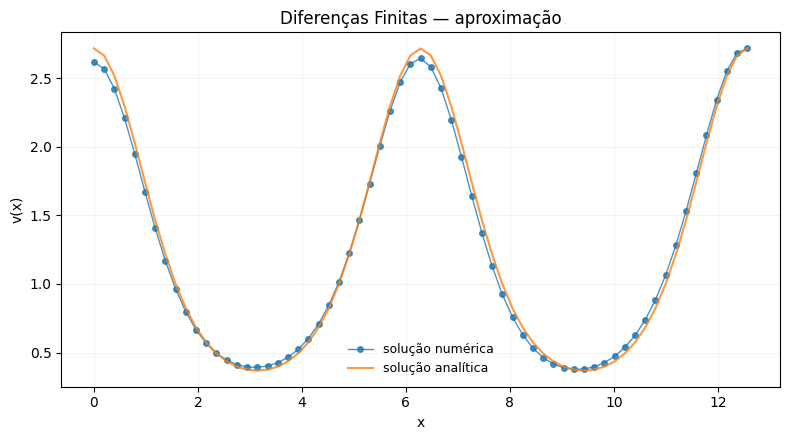

In [73]:
def v_analitica(x):
    return np.exp(np.cos(x))

# plotar resultado numérico
plt.figure(figsize=(8,4.5))
plt.plot(x_num, v_num, '-o', color='tab:blue', linewidth=1, markersize=4, alpha=0.8, label='solução numérica')
plt.plot(x_num, v_analitica(x_num), '-', color='tab:orange', linewidth=1.5, alpha=0.8, label='solução analítica')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.title('Diferenças Finitas — aproximação')
plt.legend(frameon=False, fontsize=9)
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()